<a href="https://colab.research.google.com/github/yulia1309/visualprogram/blob/main/%D0%BE%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B4%D1%80%D0%BE%D0%B1%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving pravilnaya.png to pravilnaya.png
1/1 [==============================] - 1s 1s/step
Prediction shape: (1, 2)


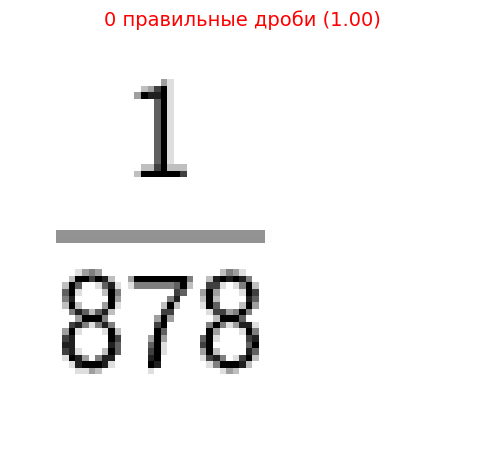

Дробь правильная, вероятность: 1.00


In [1]:
!pip install tensorflow==2.12.1
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Загрузка модели и классов
model = load_model("keras_model.h5", compile=False)
class_names = open("labels.txt", "r").readlines()

def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

    image_array = np.asarray(image, dtype=np.float32)
    normalized_image_array = (image_array / 127.5) - 1

    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data[0] = normalized_image_array

    prediction = model.predict(data)
    print(f"Prediction shape: {prediction.shape}")  # Отладка
    index = np.argmax(prediction)
    class_name = class_names[index].strip()
    confidence_score = prediction[0][index]

    return index, class_name, confidence_score

# Загрузка изображения
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Предсказание
index, predicted_class, confidence = predict_image(image_path)

# Отображение изображения
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")
plt.title(f"{predicted_class} ({confidence:.2f})", fontsize=14, color="red")
plt.show()

# Вывод результата
if index == 0:
    print(f"Дробь правильная, вероятность: {confidence:.2f}")
elif index == 1:
    print(f"Дробь неправильная, вероятность: {confidence:.2f}")
